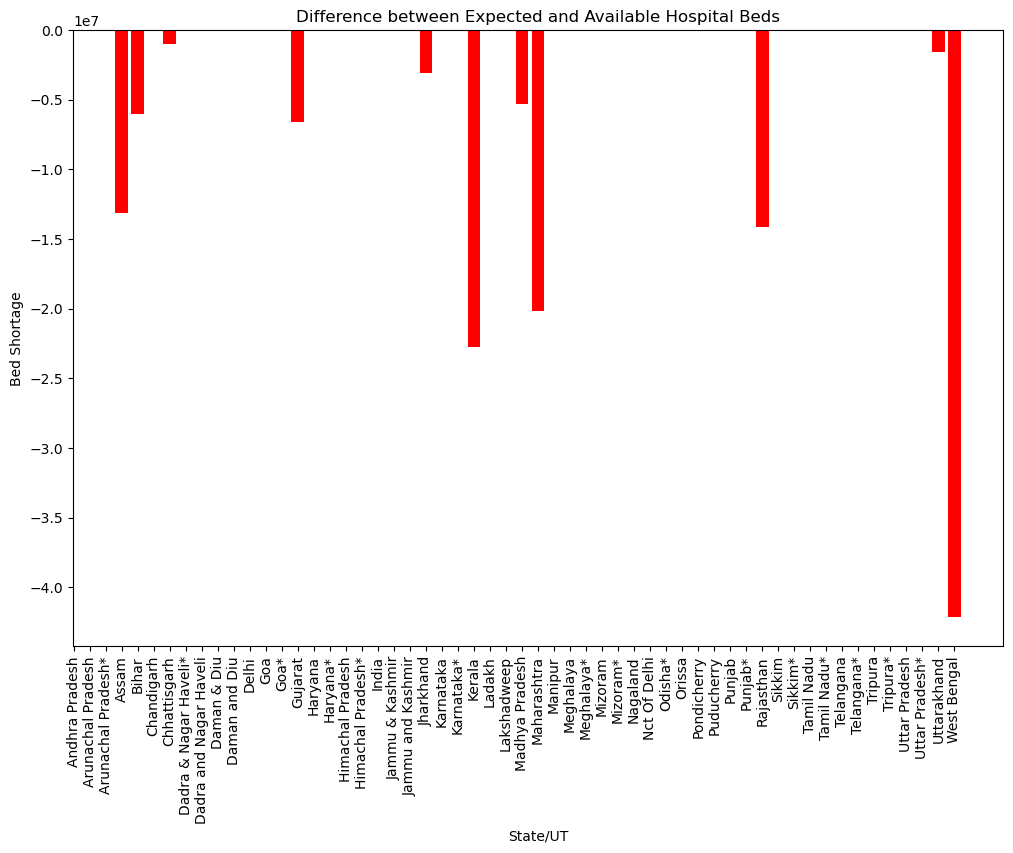

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load hospital data
hospital_data = pd.read_csv("C:/Users/meghn/OneDrive/Desktop/government_hospitals_clean.csv")

# Load population data
population_data = pd.read_csv("C:/Users/meghn/OneDrive/Desktop/census.csv")

# Calculate expected beds per State/UT
population_data['Total_Population'] = population_data['Male'] + population_data['Female']
population_data['Expected_Beds'] = population_data['Total_Population'] / 1000 * 3

# Calculate total available beds per State/UT
hospital_data['Total_Beds'] = hospital_data['Rural_Government_Hospitals'] * hospital_data['Rural_Government_Beds'] + \
                               hospital_data['Urban_Government_Hospitals'] * hospital_data['Urban_Government_Beds']

# Calculate the difference between expected and available beds
bed_shortage = population_data.groupby('State/UT')['Expected_Beds'].sum() - hospital_data.groupby('State/UT')['Total_Beds'].sum()

# Visualize the difference in number of beds
plt.figure(figsize=(12, 8))
plt.bar(bed_shortage.index, bed_shortage.values, color='red')
plt.xlabel('State/UT')
plt.ylabel('Bed Shortage')
plt.title('Difference between Expected and Available Hospital Beds')
plt.xticks(rotation=90)
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load hospital data
hospital_data = pd.read_csv("C:/Users/meghn/OneDrive/Desktop/government_hospitals_clean.csv")

# Load population data
population_data = pd.read_csv("C:/Users/meghn/OneDrive/Desktop/census.csv")

# Calculate total available beds per State/UT
hospital_data['Total_Beds'] = hospital_data['Rural_Government_Hospitals'] * hospital_data['Rural_Government_Beds'] + \
                               hospital_data['Urban_Government_Hospitals'] * hospital_data['Urban_Government_Beds']

# Calculate total population per State/UT
total_population = population_data.groupby('State/UT')['Population'].sum()

# Calculate total required beds per State/UT according to WHO standards
required_beds = total_population / 1000 * 3

# Calculate total gap in beds per State/UT
bed_gap = required_beds - hospital_data.groupby('State/UT')['Total_Beds'].sum()

# Calculate average number of beds in a government hospital
avg_beds_per_hospital = hospital_data[['Rural_Government_Beds', 'Urban_Government_Beds']].mean().mean()

# Check if avg_beds_per_hospital is NaN, and if so, replace it with 0
if np.isnan(avg_beds_per_hospital):
    avg_beds_per_hospital = 0

# Check if any NaN values exist in bed_gap, and if so, replace them with 0
if bed_gap.isnull().any():
    bed_gap.fillna(0, inplace=True)
    
# Calculate number of government hospitals required to meet the standards
government_hospitals_required = (avg_beds_per_hospital / bed_gap).round().astype(int)

# Visualize the number of government hospitals required per State/UT
plt.figure(figsize=(12, 8))
government_hospitals_required.plot(kind='bar', color='blue')
plt.xlabel('State/UT')
plt.ylabel('Number of Government Hospitals Required')
plt.title('Number of Government Hospitals Required to Meet WHO Standards')
plt.xticks(rotation=90)
plt.show()


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer